In [1]:
# import os
# os.environ['DATA_READER_VENDOR'] = 'tiingo'
%pylab inline
from requests import post
from app.analysis import Quote
def screen_securities(after=None):
    query = 'query screen($limit:[SecurityLimitOptionInput!]!,$after:String){viewer{screenSecurities(filterTypes:EQUITY,limit:$limit,sort:{type:MARKET_CAP,direction:DESC},first:100,after:$after){pageInfo{hasNextPage,endCursor},edges{node{symbol}}}}}'
    variables = {'limit':[{'type':'MARKET_CAP','min':32000000000,'inclusive':True}],'after':after}
    r = post('https://lens.m1finance.com/graphql', json={'query': query, 'variables': variables}).json()
    cursor = r['data']['viewer']['screenSecurities']['pageInfo']['endCursor']
    return [n['node']['symbol'].replace('.', '-') for n in r['data']['viewer']['screenSecurities']['edges']], cursor
s1, after = screen_securities()
s2, after = screen_securities(after)
symbols = s1 + s2 + screen_securities(after)[0]
print(len(symbols))
quote = Quote(symbols, 64, 5)
print(f'from {quote.start.date()} to {quote.end.date()} - {len(quote.data.columns)}')

Populating the interactive namespace from numpy and matplotlib
290
from 2019-04-18 to 2019-07-19 - 290


In [2]:
stats = quote.statistics()
stats = stats[(stats['shrp'] > 0) & (stats['len'] == stats['len'].max())]
print(len(stats))
stats.sort_values('mean', ascending=False).head(20)

178


,len,mean,std,shrp,yield,drawdown
Symbols,,,,,,
SHOP,60,0.646977,1.216579,0.525276,49.510691,13.405079
TEAM,60,0.462063,0.918082,0.494647,31.606828,9.588409
ANTM,60,0.362266,0.659626,0.537167,26.447498,5.078980
NOW,60,0.340288,0.881890,0.376863,22.047177,10.641814
AIG,60,0.337040,0.503355,0.653819,22.241654,3.668206
RACE,60,0.330651,0.507105,0.636386,20.000990,4.771160
NEM,60,0.319146,0.679208,0.458194,19.402969,9.412838
BSX,60,0.300612,0.481711,0.607576,20.336084,3.772070
SBUX,60,0.300398,0.475395,0.615198,19.272843,4.600183


evicted CMCSA 0.700 -0.297
evicted BCE 0.663 -0.263
evicted INFY 0.649 -0.435
evicted DUK 0.662 -0.162
evicted PM 0.649 -0.398
evicted HCA 0.689 -0.323
evicted EW 0.667 -0.326
evicted MMC 0.681 -0.380
evicted TRI 0.660 -0.354
evicted T 0.627 -0.458
evicted CI 0.641 -0.274
evicted TM 0.682 -0.331
evicted BUD 0.650 -0.331
evicted MCD 0.544 -0.318
evicted DEO 0.659 -0.303
evicted IBN 0.676 -0.443
evicted SNE 0.684 -0.480
evicted WBA 0.661 -0.340
evicted TMUS 0.612 -0.176
evicted LMT 0.676 -0.314
evicted NOC 0.528 -0.493
evicted ZTS 0.682 -0.195
evicted AEP 0.685 -0.311
evicted UL 0.625 -0.293
evicted CME 0.624 -0.376
evicted PSX 0.637 -0.277
evicted KMB 0.601 -0.205
evicted EPD 0.675 -0.335
evicted GE 0.655 -0.326
evicted JCI 0.517 -0.277
evicted RELX 0.592 -0.352
evicted NOW 0.677 -0.342
evicted COF 0.677 -0.347
evicted PLD 0.667 -0.249
evicted DIS 0.615 -0.120
evicted DG 0.538 -0.367
evicted BDX 0.555 -0.428
evicted ADI 0.679 -0.269
evicted PBR 0.672 -0.281
evicted ISRG 0.654 -0.070
evi

,count,mean,std,min,25%,50%,75%,max,shrp,yield,drawdown
Portfolio,60.0,0.161288,0.118000,-0.051980,0.069666,0.165587,0.240958,0.495339,1.299588,10.266140,1.175532
AIG,60.0,0.337040,0.503355,-0.500841,-0.010364,0.277721,0.618538,1.846643,0.653819,22.241654,3.668206
NEE,60.0,0.176913,0.339030,-0.562600,-0.026773,0.162204,0.407809,0.880774,0.498410,11.457606,3.373785
JCI,60.0,0.208937,0.439763,-0.637762,-0.133552,0.152484,0.523394,1.256046,0.457064,13.176582,3.603832
AMT,60.0,0.138293,0.497934,-1.176233,-0.074118,0.090395,0.462155,1.128027,0.261794,7.017337,6.997058
APC,60.0,0.183029,0.689786,-0.812411,-0.121740,0.058281,0.250087,2.578339,0.253836,14.826303,7.948851
BSBR,60.0,0.137979,0.727907,-1.751446,-0.247572,0.042226,0.598852,1.745772,0.178653,9.084456,13.663542
VALE,60.0,0.123368,0.726388,-1.466667,-0.441529,-0.023764,0.710983,1.687116,0.158911,5.405408,14.339339
RIO,60.0,0.015302,0.487721,-0.804422,-0.363390,-0.074836,0.376899,1.212203,0.015101,0.559487,6.094955


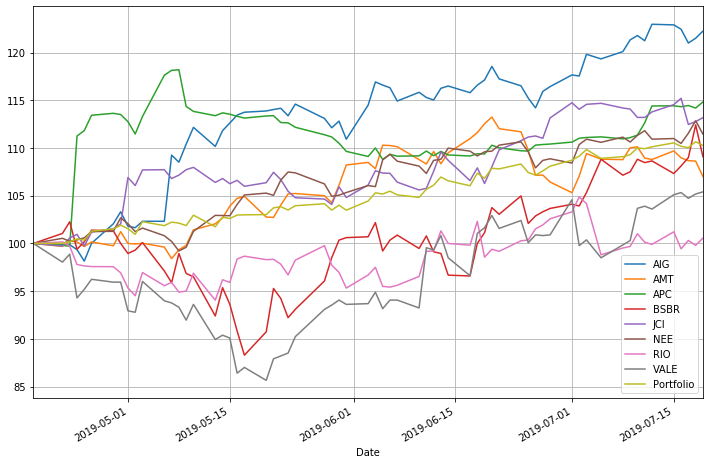

In [3]:
bounds = .12, .16
quote.setup_mask(stats.index)
sd = quote.optimize_portfolio(min_percent=.05, max_count=8, backlogs_pos_threshold=.7, bounds=bounds)
quote.setup_mask(['AIG', 'AMT', 'APC', 'ITUB', 'JCI', 'NEE', 'RIO', 'SYY'])
sd.update(quote.optimize_portfolio(min_percent=.05, max_count=8, bounds=bounds))
quote.setup_mask({e for r in sd.values() for e in r})
sd.update(quote.optimize_portfolio(min_percent=.05, max_count=8, bounds=bounds))
for e in sd:
    print(e, sd[e])
_, ratio = sd.peekitem()
quote.setup_mask(ratio)
quote.graph(ratio)

{'AIG': 0.109, 'AMT': 0.144, 'APC': 0.094, 'ITUB': 0.147, 'JCI': 0.134, 'NEE': 0.085, 'RIO': 0.221, 'SYY': 0.066}


,count,mean,std,min,25%,50%,75%,max,shrp,yield,drawdown
Portfolio,60.0,0.161777,0.120797,-0.102638,0.071176,0.183422,0.239455,0.440124,1.273552,9.998196,1.278603
AIG,60.0,0.337040,0.503355,-0.500841,-0.010364,0.277721,0.618538,1.846643,0.653819,22.241654,3.668206
NEE,60.0,0.176913,0.339030,-0.562600,-0.026773,0.162204,0.407809,0.880774,0.498410,11.457606,3.373785
JCI,60.0,0.208937,0.439763,-0.637762,-0.133552,0.152484,0.523394,1.256046,0.457064,13.176582,3.603832
ITUB,60.0,0.248726,0.749194,-1.401400,-0.268940,0.244115,0.711837,1.588344,0.321398,15.526499,11.289050
AMT,60.0,0.138293,0.497934,-1.176233,-0.074118,0.090395,0.462155,1.128027,0.261794,7.017337,6.997058
APC,60.0,0.183029,0.689786,-0.812411,-0.121740,0.058281,0.250087,2.578339,0.253836,14.826303,7.948851
SYY,60.0,0.045525,0.574727,-1.657913,-0.224116,0.048593,0.421472,0.956186,0.065402,0.364945,8.835605
RIO,60.0,0.015302,0.487721,-0.804422,-0.363390,-0.074836,0.376899,1.212203,0.015101,0.559487,6.094955


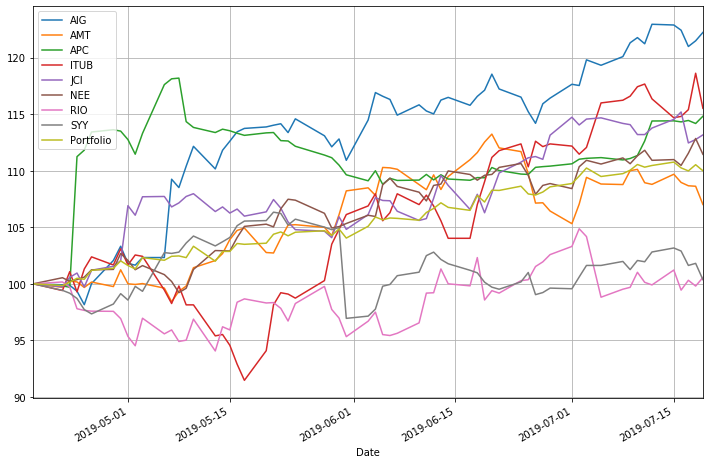

In [4]:
quote.setup_mask(['AIG', 'AMT', 'APC', 'ITUB', 'JCI', 'NEE', 'RIO', 'SYY'])
ratio, *_ = quote.find_optimal_ratio(bounds=bounds)
print(ratio)
quote.graph(ratio)